# Commissioning Instrument Plots

Take CI exposures and make nice plots.

Uses the Commissioning Instrument SBIG Camera Orientation document: DESI-3347.

Correctly plotting the relative orientations of the CI chips is tricky, so refer to this document. Outputs were checked against the DS9 plotter in desi-16.

In [1]:
from glob import glob
import os

import numpy as np
from astropy.io import ascii, fits

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Plotting Function

An effort to plot the CI chips with the correct orientations, using sky coordinates.

In [2]:
def plotCI(hdu, lothresh=1., hithresh=99., output=None):
    """Grab the chip data from the CI and plot them in sky coordinates.
    
    Parameters
    ----------
    lothresh : float
        Lower threshold, as a percentile, to use in the image dynamic range.
    hithresh : float
        Upper threshold, as a percentile, to use in the image dynamic range.
    output : str
        Filename to save the image.
    """
    fig = plt.figure(figsize=(12,12))
    gs = gridspec.GridSpec(14, 14, wspace=0, hspace=0.1)

    # CIN chip. According to DESI-3347, its coordinates are
    #
    # +----> x
    # |
    # |
    # V
    # y
    #
    axN = plt.subplot(gs[1:5, 4:10])
    axN.set(xticks=[], yticks=[])
    data = hdu['CIN'].data
    lo, hi = np.percentile(data.flatten(), [lothresh, hithresh])
    axN.imshow(data, origin='upper', vmin=lo, vmax=hi, aspect='equal', interpolation='nearest')
    axN.text(0.05, 0.9, 'CIN', color='w', fontsize=12, transform=axN.transAxes)

    # CIE chip. According to DESI-3347, its coordinates are
    #
    # x
    # A
    # |
    # |
    # +----> y
    #
    axE = plt.subplot(gs[4:10, 0:4])
    axE.set(xticks=[], yticks=[])
    data = hdu['CIE'].data
    lo, hi = np.percentile(data.flatten(), [lothresh, hithresh])
    axE.imshow(data.T, origin='lower', vmin=lo, vmax=hi, aspect='equal', interpolation='nearest')
    axE.text(0.05, 0.9, 'CIE', color='w', fontsize=12, transform=axE.transAxes)

    # CIC chip. According to DESI-3347, its coordinates are
    #
    #        y
    #        A
    #        |
    #        |
    # x <----+
    #
    axC = plt.subplot(gs[5:9, 4:10])
    axC.set(xticks=[], yticks=[])
    data = hdu['CIC'].data
    lo, hi = np.percentile(data.flatten(), [lothresh, hithresh])
    axC.imshow(np.fliplr(data), origin='lower', vmin=lo, vmax=hi, aspect='equal', interpolation='nearest')
    axC.text(0.05, 0.9, 'CIC', color='w', fontsize=12, transform=axC.transAxes)

    # CIW chip. According to DESI-3347, its coordinates are
    #
    # y <----+
    #        |
    #        |
    #        V
    #        x
    #
    axW = plt.subplot(gs[4:10, 10:])
    axW.set(xticks=[], yticks=[])
    data = hdu['CIW'].data
    lo, hi = np.percentile(data.flatten(), [lothresh, hithresh])
    axW.imshow(np.fliplr(data.T), origin='upper', vmin=lo, vmax=hi, aspect='equal', interpolation='nearest')
    axW.text(0.05, 0.9, 'CIW', color='w', fontsize=12, transform=axW.transAxes)

    # CIS chip. According to DESI-3347, its coordinates are
    #
    #        y
    #        A
    #        |
    #        |
    # x <----+
    #
    axS = plt.subplot(gs[9:13, 4:10])
    axS.set(xticks=[], yticks=[])
    data = hdu['CIS'].data
    lo, hi = np.percentile(data.flatten(), [lothresh, hithresh])
    axS.imshow(np.fliplr(data), origin='lower', vmin=lo, vmax=hi, aspect='equal', interpolation='nearest')
    axS.text(0.05, 0.9, 'CIS', color='w', fontsize=12, transform=axS.transAxes)

#     fig.tight_layout()
    
    if output is not None:
        fig.savefig(output)

In [3]:
basedir = '/project/projectdirs/desi/spectro/data'

In [4]:
# List all exposures from 2019/04/23
print(sorted(os.listdir('/project/projectdirs/desi/spectro/data/20190423/')))

['00009178', '00009179', '00009180', '00009182', '00009183', '00009184', '00009185', '00009186', '00009187', '00009188', '00009191', '00009192', '00009193', '00009194', '00009195', '00009196', '00009197', '00009199', '00009201', '00009202', '00009203', '00009204', '00009205', '00009212', '00009213', '00009214', '00009215', '00009216', '00009218', '00009219', '00009220', '00009221', '00009222', '00009234', '00009235', '00009236', '00009237', '00009238', '00009239', '00009240', '00009242', '00009243', '00009244', '00009245', '00009248', '00009249', '00009250', '00009251', '00009252', '00009254', '00009255', '00009256', '00009257', '00009258', '00009260', '00009261', '00009262', '00009263', '00009264', '00009266', '00009267', '00009268', '00009269', '00009270', '00009272', '00009273', '00009274', '00009275', '00009276', '00009278', '00009279', '00009280', '00009281', '00009282', '00009284', '00009285', '00009286', '00009287', '00009288', '00009290', '00009291', '00009292', '00009293', '00

## Donut Tests: April 23, 2019

Plot some data from the extended donut tests on April 23 (expid = 9248-9299).

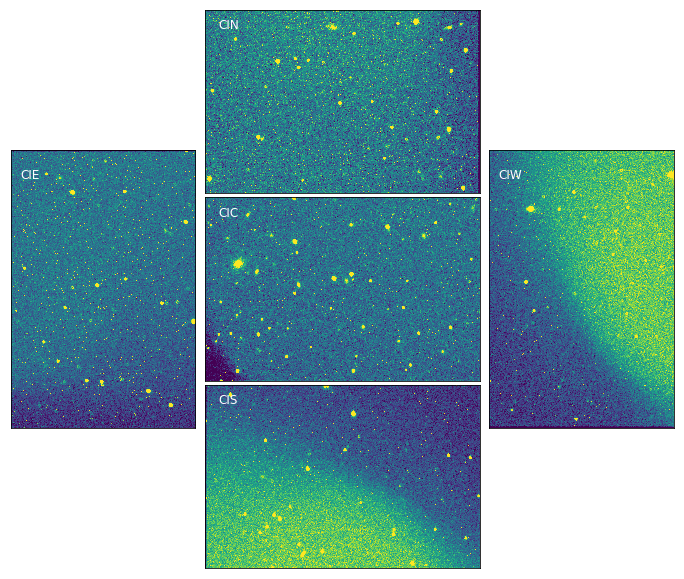

In [5]:
date = '20190423'
expid = '9258'
hdu = fits.open('{}/{}/0000{}/ci-0000{}.fits.fz'.format(basedir, date, expid, expid))
plotCI(hdu)

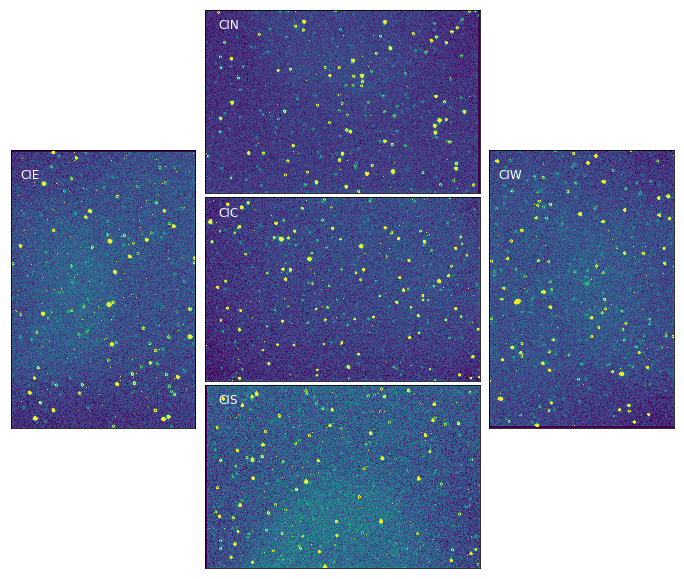

In [6]:
date = '20190423'
expid = '9299'
hdu = fits.open('{}/{}/0000{}/ci-0000{}.fits.fz'.format(basedir, date, expid, expid))
plotCI(hdu)

## Large Displacement Test

Here (expid=9199) the corrector was displaced by a large amount from the focal surface to produce coma aberration.

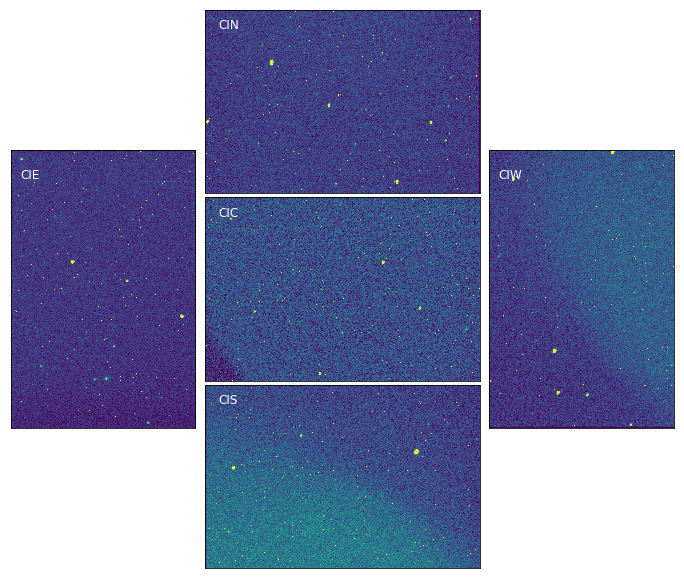

In [7]:
date = '20190423'
expid = '9199'
hdu = fits.open('{}/{}/0000{}/ci-0000{}.fits.fz'.format(basedir, date, expid, expid))
plotCI(hdu, lothresh=1, hithresh=99.8)